In [113]:
# import all neccesry packages
import numpy as np
from matplotlib import pyplot as plt
import math
import csv

In [114]:
# class 
class Node:
    def __init__(self , id , poly_id,x , y  ):
        self.x = x # x-position
        self.y = y # y-postion
        self.id = id # vertices id 
        self.poy_id = poly_id # which poloygon it belongs 
        self.f_score = float('inf') # initialize as inifinity 
        self.g_score = float('inf') # initialize as inifinity 
        self.parent  = None
       
    def calcu_huristic(self,goal):
        distance = math.sqrt( (self.x-goal.x)**2 + (self.y-goal.y)**2 )
        return distance 
    def get_distance(self,goal):
        distance = math.sqrt( (self.x-goal.x)**2 + (self.y-goal.y)**2 )
        return distance 
    def __str__(self):
        return str(self.id)
    
    
# returns the a node with smallest g_score
def lowest_f_score(open_list):
        min_node = open_list[0]
        for i in range(1,len(open_list)):
            if(open_list[i].f_score < min_node.f_score):
               min_node = open_list[i]
        return min_node    
    
# reconstract a path from closed list
def reconstruct_path(closed_list,start,goal):

    path = [goal]
    current = goal
    length = len(closed_list)

    while current != start:
        
        current =  current.parent    
        path.append(current)  
       
    return path[::-1]
# returns the child of a node
def get_childrens(node , edge_list , vertices):
    childrens= []
    for edge in edge_list:
        if(edge[0] == node.id):
            childrens.append(vertices[edge[1]])
        if(edge[1] == node.id):
            childrens.append(vertices[edge[0]])
    return childrens

# plotting
def plot(edge_list,vertices,path=[]):
    x_path = [v.x for v in path ]
    y_path = [v.y for v in path ]
    
    for i,edge in enumerate(edge_list):
        p0x , p1x  =  [vertices[edge[0]].x , vertices[edge[1]].x] 
        p0y , p1y   = [vertices[edge[0]].y , vertices[edge[1]].y]
        plt.plot([p0x,p1x],[p0y,p1y],'bo',linestyle ='--')   
    
    for i,v in enumerate(vertices):
        plt.text(v.x-0.05,v.y+0.08, str(i))
    
    plt.plot(x_path,y_path,color='red')
    plt.show()
           

In [115]:
def  AStar(goal , start , vertices ,edge_list) : 
    
    open_list =   [start]
    closed_list = []  
    start.g_score = 0
    start.h_score = start.calcu_huristic(goal)
    start.f_score = start.g_score + start.h_score
    start.parent  = None
    
    while len(open_list) > 0 :       
         
        current  = lowest_f_score(open_list)   # 
        closed_list.append(current)
        open_list.remove(current)
        # print("_______________________--")
        # print("--open-list")
        # for x in open_list:
            
        #     print("{}-{}-{}".format(x.id,x.f_score,x.parent))
        # print("--closed-list")
        
        # for x in closed_list:        
        #     print("{}-{}-{}".format(x.id,x.f_score ,x.parent))
                 
        if current == goal:  # if goal is found reconstract the path  
            return reconstruct_path(closed_list,start,goal)  
        childrens = get_childrens(current , edge_list, vertices)  
        # expand the node to childs    
        for child in childrens  :
            tentative_g = current.g_score + child.get_distance(current)
            if(tentative_g < child.g_score and not child in closed_list):
                child.g_score = tentative_g
                child.f_score = tentative_g + child.calcu_huristic(goal)
                child.parent  = current
                if(not child in open_list ):
                    open_list.append(child)
                 
    return []        # returns empty path if path is not found 
         
         
    

['# Format: belongs_to_polygon', ' vertex_x', ' vertex_y. Notice that firts and last vertices do not belong to ant polygon. They are start and goal points.']
path: [0, 1, 4, 8, 10, 13]
path_dis 15.990555296232605


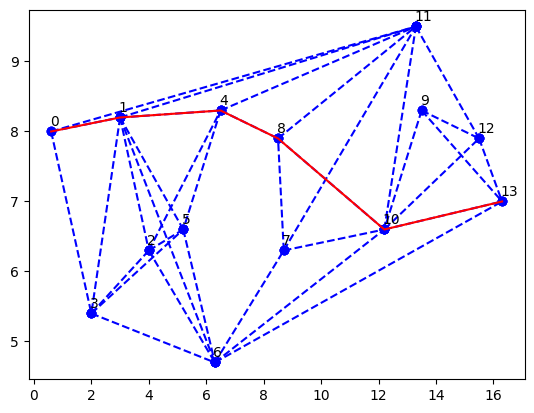

In [116]:
# reades vertices from csv file
def load_vertices(file_name):
    vertices = []
    with open(file_name) as file: 
        csvfile = csv.reader(file)    
        header = next(csvfile)
        print(header)
        # read the file and create object of the vertices
        for index, row in enumerate(csvfile):
            # index | polygon_id | x-position|y_position
            vertices.append(Node(index ,int(row[0]), float(row[1]),float(row[2])))
    return vertices

# read visibile edges from csv file
# note that : the firist and the lass vertices are the start and goal of the path
def load_edges(file_name):
    edge_list = [] 
    header = []
    with open(file_name) as file:
        csvfile = csv.reader(file)
        header =next(csvfile)
        for row in csvfile:
            edge = (int(row[0]) , int(row[1]))
            edge_list.append(edge)
       
    return edge_list

vertices = load_vertices("./resources/env_2.csv") 
edge_list = load_edges('./resources/visibility_graph_env_2.csv')


goal = vertices[-1] # goal vertices 
start = vertices[0] # start vertices
path = AStar(goal,start,vertices,edge_list)
if(not path):
    print("Failure ! Path not found")
else:
    print("path:",[node.id for node in path] )
    print("path_dis",goal.f_score)
plot(edge_list,vertices,path)
